In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
imdb = keras.datasets.imdb

In [8]:
vocab_size = 10000

In [9]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

In [10]:
print(f'Training Data: {len(train_data)}, Test Data: {len(test_data)}')

Training Data: 25000, Test Data: 25000


In [11]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [12]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [13]:
word_index = {k:(v+3) for k, v in word_index.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2
word_index['<UNUSED>'] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [14]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [15]:
decode_review(test_data[0])

"<START> please give this one a miss br br <UNK> <UNK> and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite <UNK> so all you madison fans give this a miss"

In [16]:
# standardize the lengths
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index['<PAD>'],
                                                        padding='post',
                                                        maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=256)

In [17]:
len(train_data[0]), len(test_data[1])

(256, 256)

# Model

In [16]:
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [23]:
fit_model = model.fit(partial_x_train,
                      partial_y_train,
                      epochs=40,
                      batch_size=512,
                      validation_data=(x_val, y_val),
                      verbose=2)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 - 1s - loss: 0.5177 - accuracy: 0.8297 - val_loss: 0.5099 - val_accuracy: 0.8226
Epoch 2/40
15000/15000 - 1s - loss: 0.4691 - accuracy: 0.8483 - val_loss: 0.4682 - val_accuracy: 0.8352
Epoch 3/40
15000/15000 - 1s - loss: 0.4246 - accuracy: 0.8619 - val_loss: 0.4315 - val_accuracy: 0.8459
Epoch 4/40
15000/15000 - 1s - loss: 0.3860 - accuracy: 0.8751 - val_loss: 0.4019 - val_accuracy: 0.8531
Epoch 5/40
15000/15000 - 1s - loss: 0.3537 - accuracy: 0.8837 - val_loss: 0.3777 - val_accuracy: 0.8603
Epoch 6/40
15000/15000 - 1s - loss: 0.3268 - accuracy: 0.8904 - val_loss: 0.3593 - val_accuracy: 0.8640
Epoch 7/40
15000/15000 - 1s - loss: 0.3048 - accuracy: 0.8971 - val_loss: 0.3433 - val_accuracy: 0.8702
Epoch 8/40
15000/15000 - 1s - loss: 0.2851 - accuracy: 0.9025 - val_loss: 0.3316 - val_accuracy: 0.8730
Epoch 9/40
15000/15000 - 1s - loss: 0.2685 - accuracy: 0.9080 - val_loss: 0.3220 - val_accuracy: 0.8762
Epoch 10/40
15

In [25]:
model.evaluate(test_data, test_labels)

25000/25000 [==============================] - 1s 21us/sample - loss: 0.3603 - accuracy: 0.8678


[0.36034187620162966, 0.86784]

In [30]:
history_dict = fit_model.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

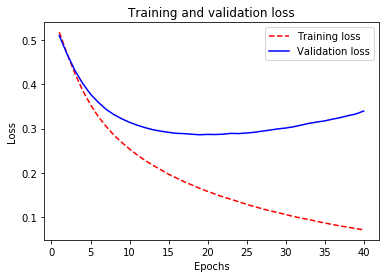

In [45]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Prediction

In [96]:
test_review = test_data[20]
predict_review = model.predict(np.expand_dims(test_review, axis=0))
print('Review:', decode_review(test_review), sep='\n')
print('Prediction: ' + str(predict_review))
print('Actual: ' + str(test_labels[20]))

Review:
<START> this film was one that i have waited to see for some time i was glad to find it has been everything anticipated the writing of this film has been so finely crafted and <UNK> far beyond what is seen by the audience i found it amusing that so many people watching will not read between some very important lines but indeed if not the movie will make sense in a different way and is very brilliant the film has many stories and characters woven together around this one character <UNK> a man whom has rose from the streets amidst many <UNK> and become a very powerful criminal after spending some time in prison <UNK> finds a <UNK> in the justice system and through a disturbing turn of events is released only to find everything is not at all what it seems <UNK> finds himself going up against the higher realm of society and political <UNK> in order to make clear how important a man's word is and stands for a war begins as the street is in arms against <UNK> of wealth and corrupt po

# Save and load the Model

In [46]:
model.save('model.h5')

In [3]:
model = keras.models.load_model('model.h5')

W0531 04:53:04.574142 139686077036352 deprecation.py:323] From /home/assassin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Predict input review

In [27]:
def review_encode(text):
    encoded = [1]
    for word in text.split():
        if word.lower() in word_index:
            encoded.append(word_index[word.lower()])
        else:
            encoded.append(2)
    return encoded

In [74]:
review = input('Enter a movie review!')
review

Enter a movie review!such an amazing movie


'such an amazing movie'

In [75]:
import re
mod_review = re.sub('\?|\.|\!|\;|\:|\(|\)|\[|\]|\{|\}|\'|\"', '', review)

In [76]:
encode = review_encode(mod_review)
encode = keras.preprocessing.sequence.pad_sequences([encode],
                                                    value=word_index['<PAD>'],
                                                    padding='post',
                                                    maxlen=256)
predict = model.predict(encode)
print(review)
print(encode[0])
print(decode_review(encode[0]))
print(predict[0])

such an amazing movie
[  1 141  35 480  20   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 